# Predictive Analytics - Classification

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Before training predictive models

### 1.2. Preparing the data

In [2]:
df_hr = pd.read_csv("hr_data.csv")

In [3]:
# Checking the number of rows in the dataset
len(df_hr)

14999

In [4]:
# Checking the column names
df_hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'is_smoker', 'department', 'salary'],
      dtype='object')

In [5]:
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low


In [6]:
df_hr.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
14994,0.40,0.57,2,151.0,3.0,0,yes,0,NaN,support,low
14995,0.37,0.48,2,160.0,3.0,0,yes,0,NaN,support,low
14996,0.37,0.53,2,143.0,3.0,0,yes,0,NaN,support,low
14997,0.11,0.96,6,280.0,4.0,0,yes,0,NaN,support,low
14998,0.37,0.52,2,158.0,3.0,0,yes,0,NaN,support,low


#### 1.2.1. Assess the target


In [7]:
# Distribution of target variable
df_hr.left.value_counts()   

left
no     11428
yes     3571
Name: count, dtype: int64

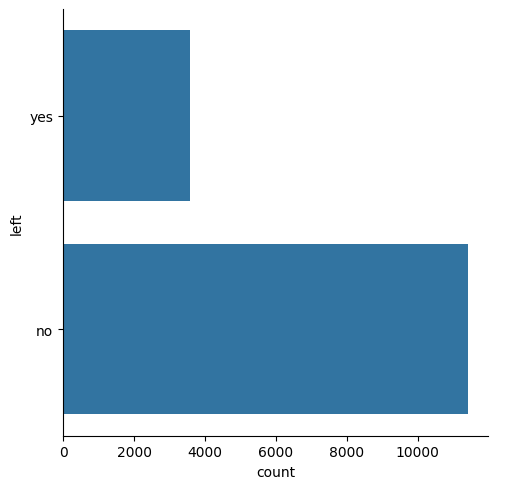

In [8]:
# Plotting the distribution of the target variable
sns.catplot(data=df_hr, y="left", kind="count")
plt.show()

In [10]:
# Number of missing values in the target variable
df_hr.left.isna().sum()

0

#### 1.2.2. Assess the features

Distributions

In [14]:
# Printing datatypes of each column
df_hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours     float64
time_spend_company       float64
work_accident              int64
left                      object
promotion_last_5years      int64
is_smoker                 object
department                object
salary                    object
dtype: object

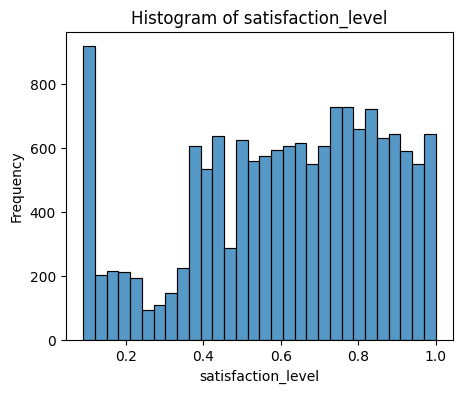

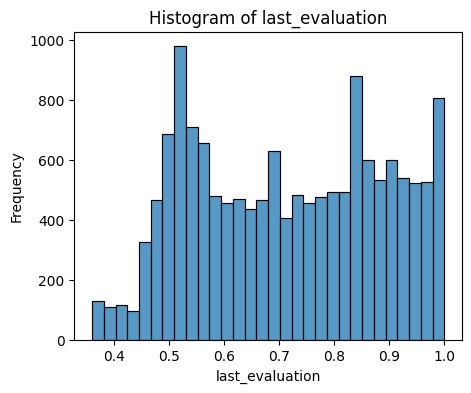

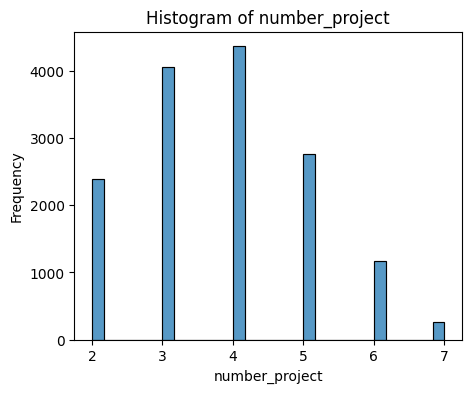

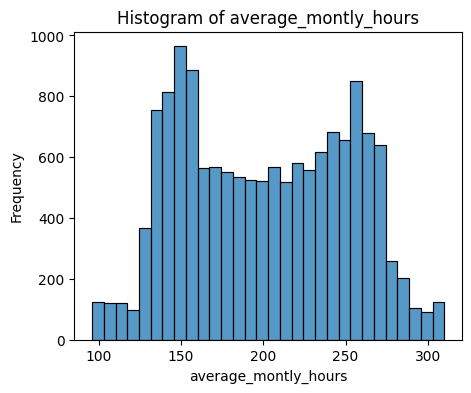

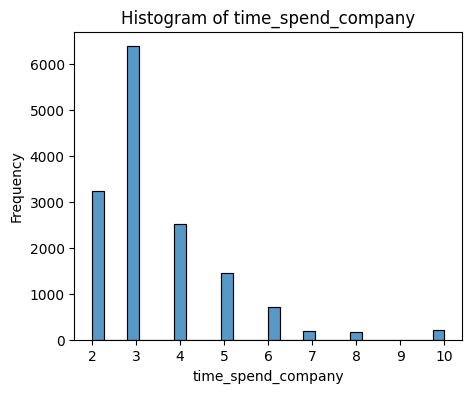

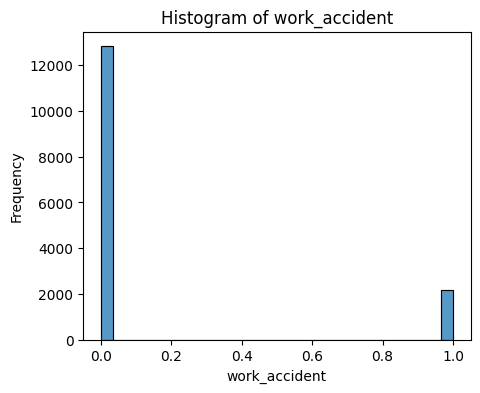


left
no     11428
yes     3571
Name: count, dtype: int64
------------------------------


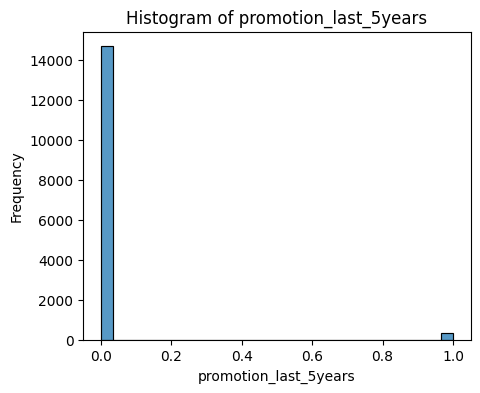


is_smoker
no     180
yes     55
Name: count, dtype: int64
------------------------------

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64
------------------------------

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64
------------------------------


In [15]:
# Displaing the feature distributions
for col in df_hr.columns:

    if df_hr[col].dtype == int or df_hr[col].dtype == float:
        plt.figure(figsize=(5, 4))
        sns.histplot(df_hr[col], bins=30) 
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    elif df_hr[col].dtype == object:
        print()
        print(df_hr[col].value_counts())
        print('-'*30)
        plt.close()
        
        

#### 1.2.3. Missing values

In [16]:
# Number of missing values
df_hr.isna().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours       368
time_spend_company         151
work_accident                0
left                         0
promotion_last_5years        0
is_smoker                14764
department                   0
salary                       0
dtype: int64

In [17]:
# Proportion of missing values
df_hr.isnull().sum() / len(df_hr) * 100

satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      2.453497
time_spend_company        1.006734
work_accident             0.000000
left                      0.000000
promotion_last_5years     0.000000
is_smoker                98.433229
department                0.000000
salary                    0.000000
dtype: float64

In [18]:
# Removing the "is_smoker" column
df_hr.drop('is_smoker', axis=1, inplace=True)

In [19]:
# Filling the NaN values in the "time_spend_company" column with the median
df_hr.time_spend_company.fillna(value=df_hr.time_spend_company.median(), inplace=True)

In [20]:
# Checking again for missing values
df_hr.isnull().sum() / len(df_hr) * 100

satisfaction_level       0.000000
last_evaluation          0.000000
number_project           0.000000
average_montly_hours     2.453497
time_spend_company       0.000000
work_accident            0.000000
left                     0.000000
promotion_last_5years    0.000000
department               0.000000
salary                   0.000000
dtype: float64

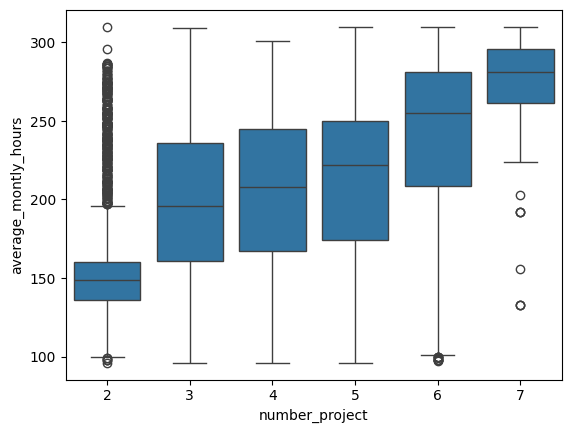

In [21]:
# Filling the NaN values in the "average_montly_hours" column


# How does "average_montly_hours" depend on "number_project"
sns.boxplot(data=df_hr, x="number_project", y="average_montly_hours")
plt.show()


In [22]:
# Calculating the mean for "average_montly_hours" depending on "number_project"

mean_hours = df_hr.groupby("number_project").average_montly_hours.mean()
mean_hours = dict(mean_hours)
mean_hours

{2: 160.16353543979506,
 3: 197.47882323104236,
 4: 205.07858315740089,
 5: 211.99962839093274,
 6: 238.73947368421054,
 7: 276.015873015873}

In [23]:
# Filling "average_monthly_hours" with the appropriate values
fill_hours = df_hr.number_project.map(mean_hours)           # "fill_hours" variable has the values representing the average monthly hours based on the number of projects
df_hr.average_montly_hours = df_hr.average_montly_hours.fillna(fill_hours)


<class 'pandas.core.series.Series'>
0    160.163535
1    211.999628
2    276.015873
3    211.999628
4    160.163535
Name: number_project, dtype: float64


In [25]:
# Making sure we are all clear of NaNs
df_hr.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [26]:
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157.000000,3.0,0,yes,0,sales,low
1,0.80,0.86,5,262.000000,6.0,0,yes,0,sales,medium
2,0.11,0.88,7,272.000000,4.0,0,yes,0,sales,medium
3,0.72,0.87,5,223.000000,5.0,0,yes,0,sales,low
4,0.37,0.52,2,160.163535,3.0,0,yes,0,sales,low


#### 1.2.4. Feature engineering

In [27]:
# Converting the target variable using "map" method
df_hr.left = df_hr.left.map({'no': 0, 'yes': 1})

In [28]:
# Converting other categorical features to binary integer representation (one-hot encoding)
df_hr = pd.get_dummies(df_hr)
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157.000000,3.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262.000000,6.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272.000000,4.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223.000000,5.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,160.163535,3.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False


In [29]:
# Checking the columns
df_hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [30]:
# Saving the processed data to a new file
df_hr.to_csv("/Users/petermicko/Desktop/Applied_Data_Science/lesson-2/df_hr_processed.csv", index=False)

## 2. Training classification models

Trained models:
- SVM
- K-Nearest Neighbours
- Random Forest


### 2.1. Training Two-Feature Classification Models with Scikit-learn

In [36]:
# Setting default figure size
plt.rcParams['figure.figsize'] = (8, 8)

In [32]:
# Loading the processed data
df_pro = pd.read_csv("df_hr_processed.csv")
df_pro.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157.000000,3.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262.000000,6.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272.000000,4.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223.000000,5.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,160.163535,3.0,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False


Visualization

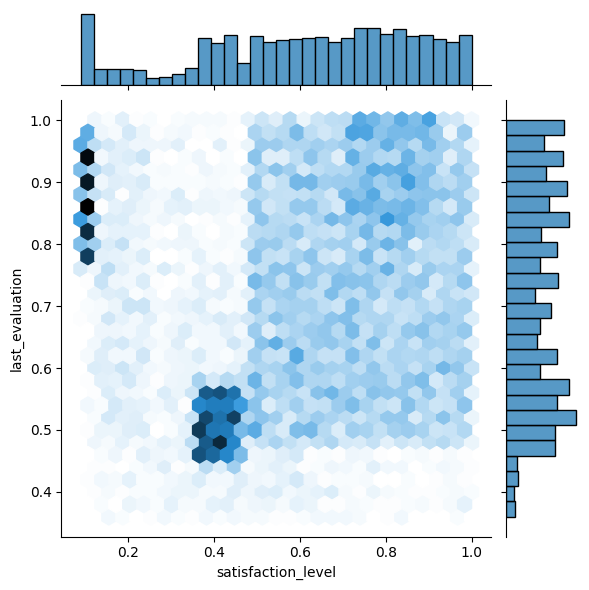

In [37]:
# Graph display for 2 features
sns.jointplot(x='satisfaction_level', y='last_evaluation',
              data=df_pro, kind='hex')

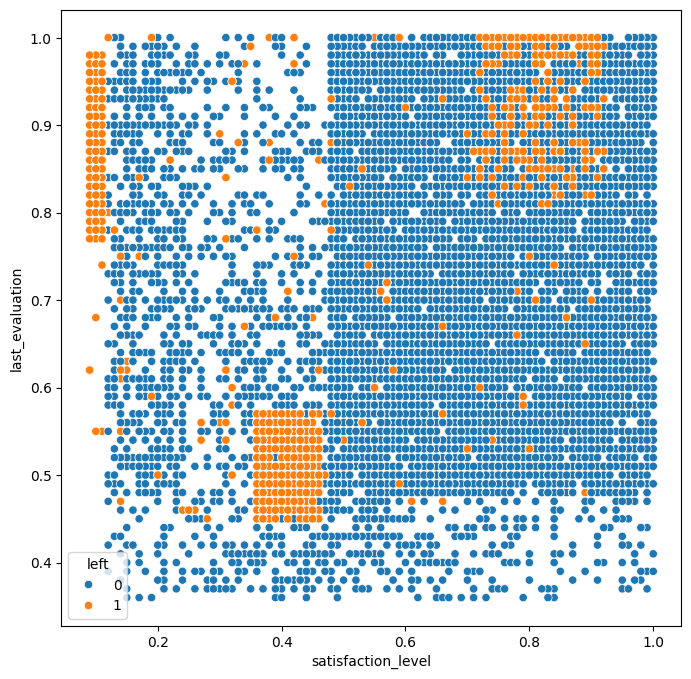

In [39]:
# Segmenting by the target variable
sns.scatterplot(data=df_pro, x='satisfaction_level', y='last_evaluation', hue="left")
plt.show()

Train-test split

In [40]:
# Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

features = ['satisfaction_level', 'last_evaluation']
X_train, X_test, y_train, y_test = train_test_split(df_pro[features].values, df_pro['left'].values, test_size=0.3, random_state=1)

Scaling

In [41]:
# Scaling the data for SVM and K-Nearest Neighbors

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#### 2.1.1. SVM

In [42]:
# Training the model
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1, kernel='linear', random_state=1)

In [48]:
# Evaluating the model (classification accuracy)
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy = {(acc*100):.2f}%")

Accuracy = 75.91%


In [54]:
# Accuracy score per class
from sklearn.metrics import confusion_matrix

print('Accuracy score per class:')
cmat = confusion_matrix(y_test, y_pred)
scores = cmat.diagonal() / cmat.sum(axis=1) * 100   # Number of correct predictions for each class / total number of true instances for each class
print(f'Left = 0: {scores[0]:.2f}%')
print(f'Left = 1: {scores[1]:.2f}%')

Accuracy score per class:
Left = 0: 100.00%
Left = 1: 0.00%


In [56]:
cmat

array([[3416,    0],
       [1084,    0]])

<Axes: >

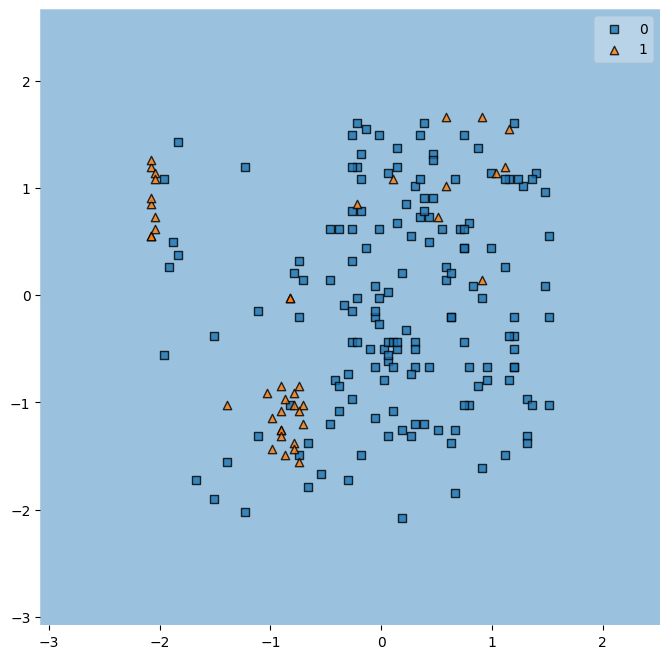

In [59]:
# Plot the resulting decision regions

from mlxtend.plotting import plot_decision_regions

N_samples = 200
X, y = X_train_std[:N_samples], y_train[:N_samples]
plot_decision_regions(X, y, clf=svm)

In [60]:
# Training with different kernel value

svm = SVC(kernel='rbf', C=1, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1, random_state=1)

In [63]:
# Custom function to check model performance

from IPython.display import display

def check_model_fit(clf, X_test, y_test):
    # Predict on test set
    y_pred = clf.predict(X_test)
    
    # Calculate and print overall test-set accuracy
    acc = accuracy_score(y_test, y_pred) * 100 
    print(f'Total accuracy = {acc:.1f}%')
    
    # Compute confusion matrix
    cmat = confusion_matrix(y_test, y_pred)
    cols = pd.MultiIndex.from_tuples([('predictions', 0), ('predictions', 1)])
    indx = pd.MultiIndex.from_tuples([('actual', 0), ('actual', 1)])
    
    # Display confusion matrix
    display(pd.DataFrame(cmat, columns=cols, index=indx))
    print()
    
    # Print test-set accuracy grouped by the target variable
    print("Accuracy score per class:")
    class_accuracies = cmat.diagonal() / cmat.sum(axis=1) * 100
    for i, score in enumerate(class_accuracies):
        print(f"Class {i} accuracy: {score:.2f}%")
    print()
    
    # Plot decision regions
    fig = plt.figure(figsize=(8, 8))
    N_samples = 200
    X_subset, y_subset = X_test[:N_samples], y_test[:N_samples]
    plot_decision_regions(X_subset, y_subset, clf=clf)
    
    plt.xlabel("satisfaction_level")
    plt.ylabel("last_evaluation")
    plt.legend(loc="upper left")
    plt.show()


Total accuracy = 89.7%


predictions     
                   0    1
actual 0        3308  108
       1         354  730


Accuracy score per class:
Class 0 accuracy: 96.84%
Class 1 accuracy: 67.34%



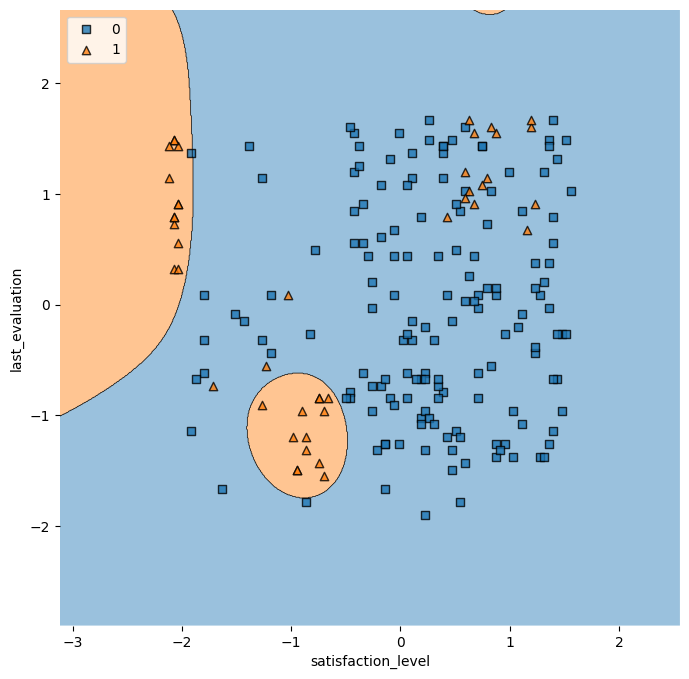

In [64]:
# Evaluating the model
check_model_fit(svm, X_test_std, y_test)

#### 2.1.2. K-Nearest Neighbors

In [66]:
# Training a K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

Total accuracy = 90.3%


predictions     
                   0    1
actual 0        3193  223
       1         215  869


Accuracy score per class:
Class 0 accuracy: 93.47%
Class 1 accuracy: 80.17%



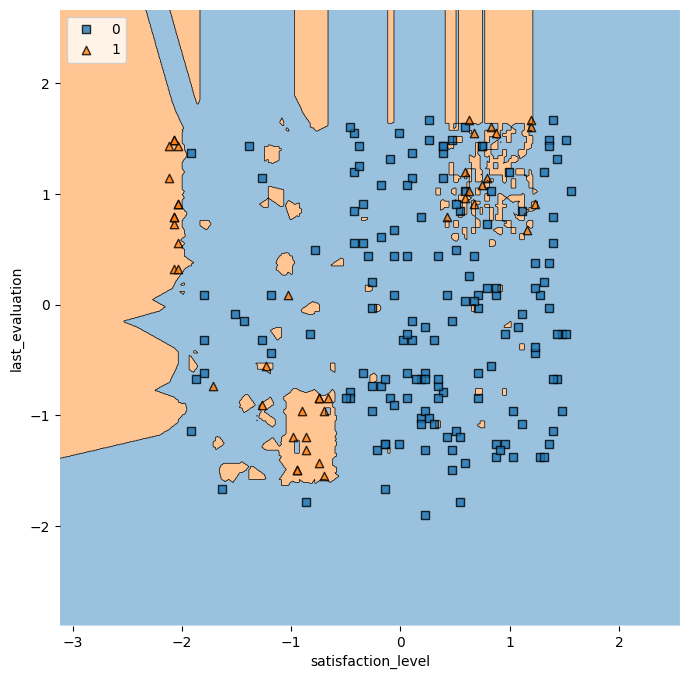

In [67]:
# Evaluating the model
check_model_fit(knn, X_test_std, y_test)

Total accuracy = 91.3%


predictions     
                   0    1
actual 0        3281  135
       1         258  826


Accuracy score per class:
Class 0 accuracy: 96.05%
Class 1 accuracy: 76.20%



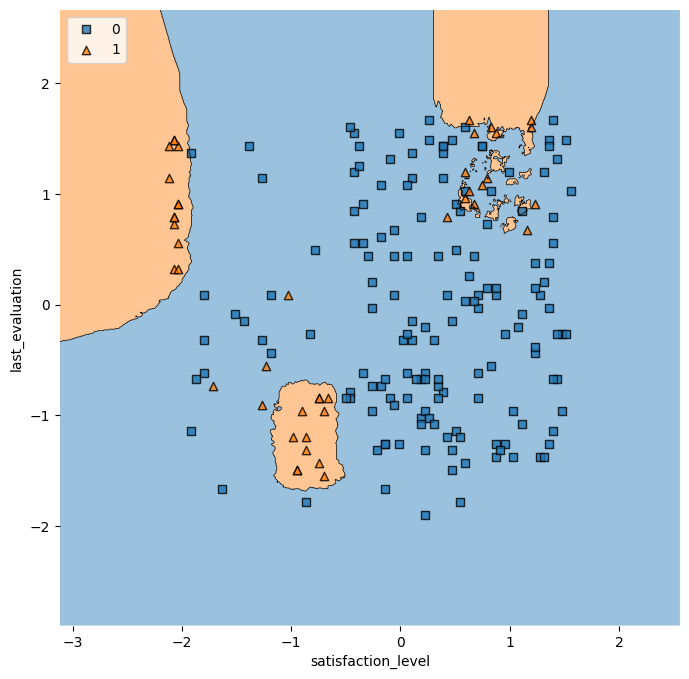

In [68]:
# Increasing the number of "nearest neighbors" to reduce overfitting

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_std, y_train)

check_model_fit(knn, X_test_std, y_test)

#### 2.1.3. Random Forest

Total accuracy = 92.0%


predictions     
                   0    1
actual 0        3371   45
       1         317  767


Accuracy score per class:
Class 0 accuracy: 98.68%
Class 1 accuracy: 70.76%



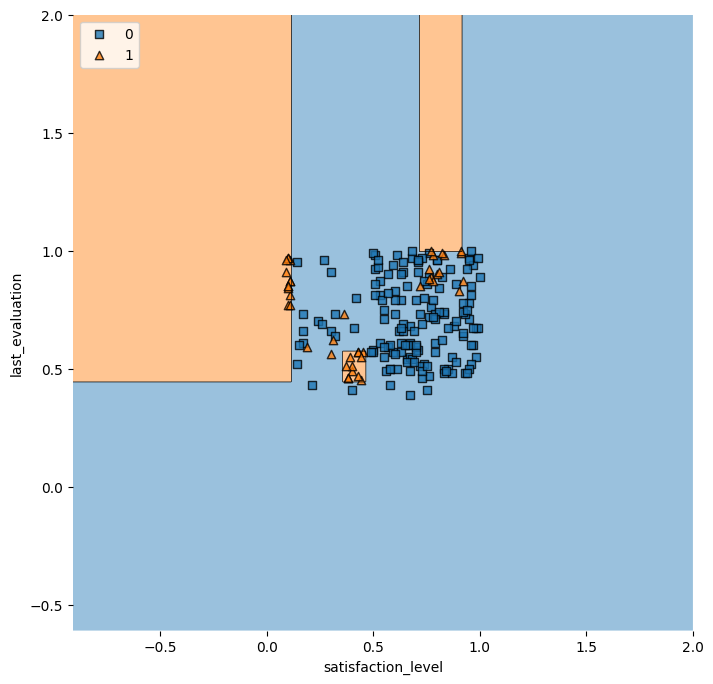

In [69]:
# Training a Random Forest model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)
forest.fit(X_train, y_train)

# Evaluating the model
check_model_fit(forest, X_test, y_test)

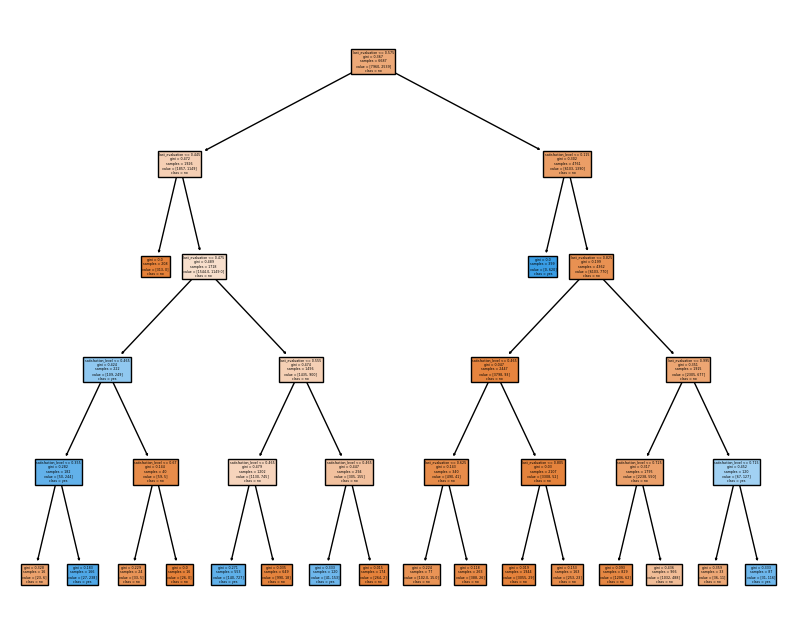

In [70]:
# Visualisation of one decision tree
from sklearn.tree import plot_tree

# Extracting an individual decision tree from the Random Forest
individual_tree = forest.estimators_[0]  # Get the first tree 

# Visualization of the decision tree using Matplotlib's plot_tree method
plt.figure(figsize=(10, 8))
plot_tree(individual_tree,feature_names=features, class_names=['no', 'yes'], filled=True)
plt.show()

### 2.2. K-fold Cross-validation and Validation curves

In [71]:
# Selecting the features and the target
features = ['satisfaction_level', 'last_evaluation']
X = df_pro[features].values
y = df_pro.left.values

#### 2.2.1. Random Forest

K-fold Cross-validation

In [74]:
# Instantiating the Random Forest model
clf = RandomForestClassifier(n_estimators=100, max_depth=5)

In [76]:
# This code performs stratified K-fold cross-validation to evaluate the performance of a classification model

from sklearn.model_selection import cross_val_score

np.random.seed(1)                   # This means that every time the code is run, it will get the same results
scores = cross_val_score(           
            estimator=clf,       
            X=X,
            y=y,
            cv=10)

print(f"Accuracy = {scores.mean():.3f} +/- {scores.std():.3f}")  # Printing the mean and standard deviation of the accuracy scores.

Accuracy = 0.923 +/- 0.005


In [77]:
# Printing the individual accuracies for each fold of the cross-validation.
print(scores)

[0.934      0.91533333 0.92266667 0.91866667 0.92133333 0.92866667
 0.91933333 0.92       0.928      0.92128085]


In [78]:
# Custom function for class accuracies

from sklearn.model_selection import StratifiedKFold

def cross_val_class_score(clf, X, y, cv=10):
    kfold = StratifiedKFold(n_splits=cv).split(X, y)     # This generates the indices to split X and y into training and testing sets for each fold.

    class_accuracy = []
    for k, (train, test) in enumerate(kfold):            # This loop goes through each fold in the cross-validation.
        clf.fit(X[train], y[train])
        y_test = y[test]
        y_pred = clf.predict(X[test])
        cmat = confusion_matrix(y_test, y_pred)          # Confusion matrix compares the true labels (y_test) with the predicted labels (y_pred).
        class_acc = cmat.diagonal()/cmat.sum(axis=1)     # The class accuracy is calculated for each class.
        class_accuracy.append(class_acc)                 # The class accuracy for the current fold is stored in the list class_accuracy.
        print(f'fold: {k+1} accuracy: {str(class_acc)}')
        
    return np.array(class_accuracy)

In [82]:
# Stratified k-fold cross validation with class accuracies 
np.random.seed(1)   # Ensuring reproducibility
scores = cross_val_class_score(clf, X, y)

print(f'Accuracy = {scores.mean(axis=0)} +/- {scores.std(axis=0)}')

fold: 1 accuracy: [0.99124343 0.75139665]
fold: 2 accuracy: [0.98950131 0.67787115]
fold: 3 accuracy: [0.98950131 0.70868347]
fold: 4 accuracy: [0.98600175 0.70308123]
fold: 5 accuracy: [0.98512686 0.71708683]
fold: 6 accuracy: [0.9816273  0.75910364]
fold: 7 accuracy: [0.98862642 0.69747899]
fold: 8 accuracy: [0.9816273  0.72268908]
fold: 9 accuracy: [0.9903762  0.72829132]
fold: 10 accuracy: [0.98861646 0.70588235]
Accuracy = [0.98722483 0.71715647] +/- [0.00330013 0.02326823]


Validation Curve

In [86]:
# Calcualte a validation curve

from sklearn.model_selection import validation_curve

clf = RandomForestClassifier(n_estimators=10)
max_depths = np.arange(3, 16, 3)

train_scores, test_scores = validation_curve(
            estimator=clf,
            X=X,
            y=y,
            param_name='max_depth',
            param_range=max_depths,
            cv=10)

In [87]:
# Function to draw the validation curve

def plot_validation_curve(train_scores, test_scores,
                          param_range, xlabel='', log=False):
    '''
    This code is from scikit-learn docs:
    https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch06/ch06.ipynb
    '''
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    fig = plt.figure()
    
    plt.plot(param_range, train_mean, 
             color=sns.color_palette('Set1')[1], marker='o', 
             markersize=5, label='training accuracy')

    plt.fill_between(param_range, 
                     train_mean + train_std,
                     train_mean - train_std, 
                     alpha=0.15, color=sns.color_palette('Set1')[1])

    plt.plot(param_range, test_mean, 
             color=sns.color_palette('Set1')[0], linestyle='--', 
             marker='s', markersize=5, 
             label='validation accuracy')

    plt.fill_between(param_range, 
                     test_mean + test_std,
                     test_mean - test_std, 
                     alpha=0.15, color=sns.color_palette('Set1')[0])

    if log:
        plt.xscale('log')
    plt.legend(loc='lower right')
    if xlabel:
        plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    plt.ylim(0.9, 1.0)
    return fig

(0.9, 0.95)

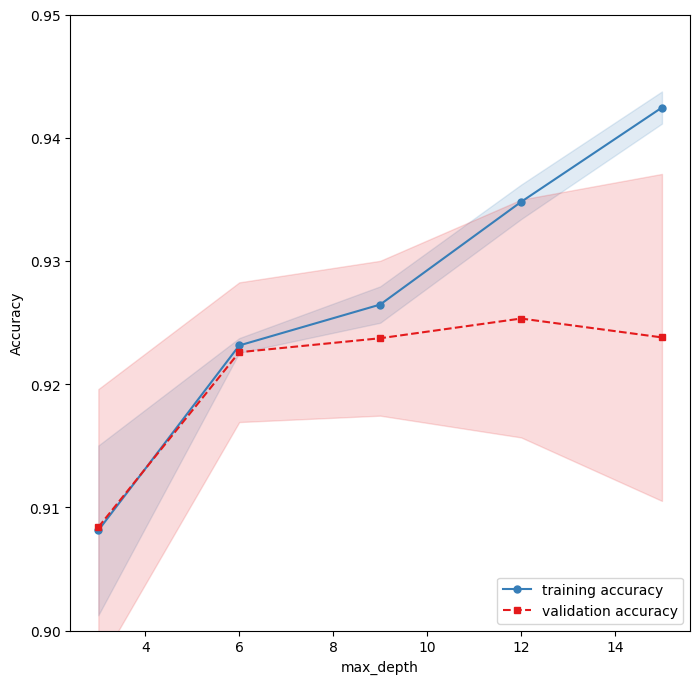

In [88]:
# Plotting the validation curve
plot_validation_curve(train_scores, test_scores,
                      max_depths, xlabel='max_depth')
plt.ylim(0.9, 0.95)

### 2.3. Training a final predictive model for the employee retention problem

In [89]:
# Displaying names of columns
df_pro.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [91]:
# Selecting the features and the target variable  (defining X and y)

features = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium']   # Removing target variable

X = df_pro[features].values
y = df_pro.left.values

#### 2.3.1. Hyper-parameter tuning

In [94]:
# Computing training/validation accuracies for different values of "max_depth" for Random Forest model

np.random.seed(1)
clf_1 = RandomForestClassifier(n_estimators=20)
max_depths = [3, 4, 5, 6, 7,
              9, 12, 15, 18, 21]

train_scores, test_scores = validation_curve(
            estimator=clf_1,
            X=X,
            y=y,
            param_name='max_depth',
            param_range=max_depths,
            cv=5)

(3.0, 21.0)

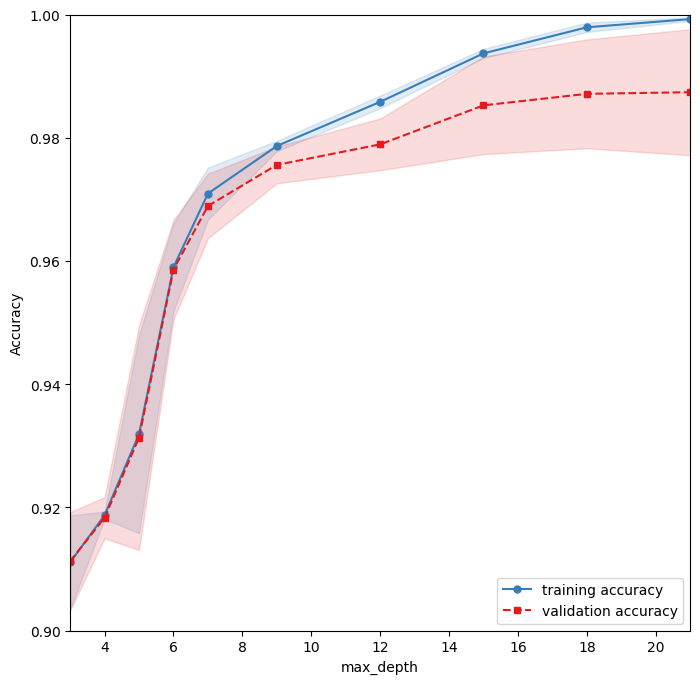

In [96]:
# Plotting validation curve
plot_validation_curve(train_scores, test_scores,
                      max_depths, xlabel='max_depth')
plt.xlim(3, 21)

In [99]:
#Computing training/validation accuracies for different values of "n_estimators"
np.random.seed(1)
clf_2 = RandomForestClassifier(max_depth=6)
n_estimators = [10, 20, 30, 40, 50, 60,80, 100, 200, 300]

train_scores, test_scores = validation_curve(
            estimator=clf_2,
            X=X,
            y=y,
            param_name='n_estimators',
            param_range=n_estimators,
            cv=5)

(10.0, 300.0)

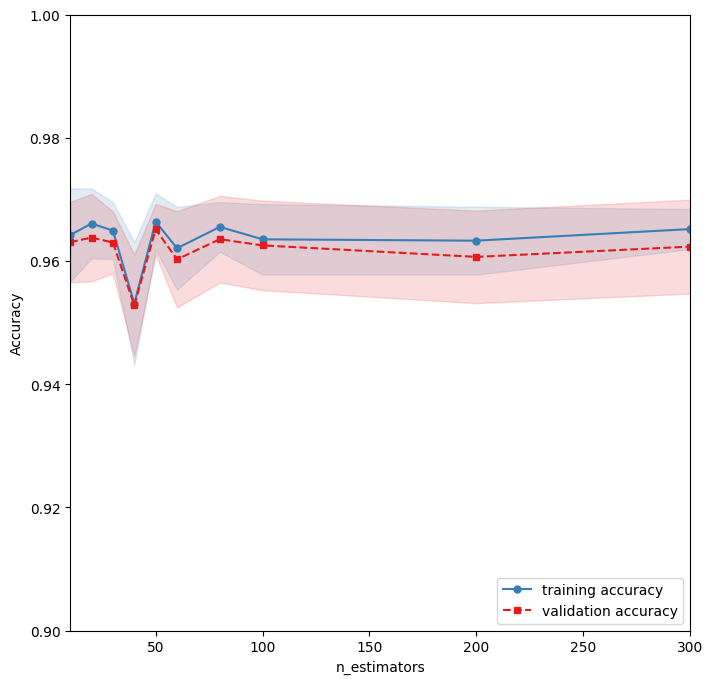

In [100]:
# Plotting validation curve
plot_validation_curve(train_scores, test_scores,
                      n_estimators, xlabel='n_estimators')
plt.xlim(10, 300)

In [106]:
# Training a Random Forest Classifier with max_depth = 6 and n_estimators = 50
# Computing the cross-validation accuracy for the classifier

np.random.seed(1)
clf = RandomForestClassifier(n_estimators=50, max_depth=6)
scores = cross_val_class_score(clf, X, y)

print(f'Accuracy = {scores.mean(axis=0)} +/- {scores.std(axis=0)}')

fold: 1 accuracy: [0.99824869 0.89944134]
fold: 2 accuracy: [0.99825022 0.81232493]
fold: 3 accuracy: [0.99387577 0.85154062]
fold: 4 accuracy: [0.99300087 0.83193277]
fold: 5 accuracy: [0.99562555 0.76470588]
fold: 6 accuracy: [0.99212598 0.82352941]
fold: 7 accuracy: [0.99562555 0.89355742]
fold: 8 accuracy: [0.99650044 0.8627451 ]
fold: 9 accuracy: [0.99475066 0.90196078]
fold: 10 accuracy: [0.99737303 0.8767507 ]
Accuracy = [0.99553767 0.8518489 ] +/- [0.00201183 0.04196363]


Text(0, 0.5, 'Accuracy')

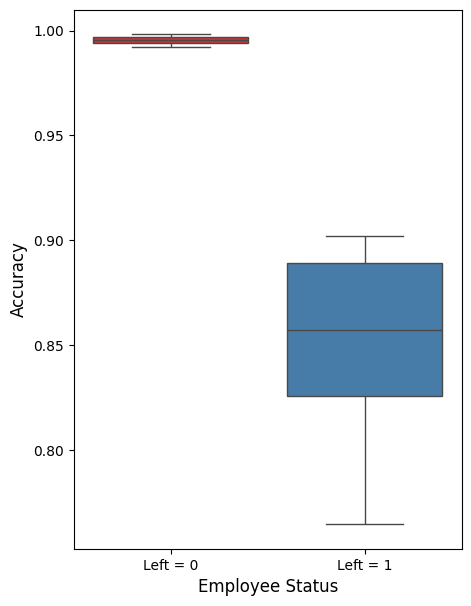

In [109]:
# Boxplot of the cross-validation scores

# Figure with a specified size
fig, ax = plt.subplots(figsize=(5, 7))

# Boxplot with seaborn (ensuring scores is converted to DataFrame) 
sns.boxplot(data=pd.DataFrame(scores, columns=["Left = 0", "Left = 1"]),
            palette="Set1", ax=ax)

ax.set_xlabel("Employee Status", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)

#### 2.3.2. Feature importance

In [112]:
# Accessing feature importances

d = (clf.feature_importances_, df_pro[features].columns)
list(zip(*d))

[(0.28461089246732624, 'satisfaction_level'),
 (0.09877527362475562, 'last_evaluation'),
 (0.24344778440186327, 'number_project'),
 (0.1505923622257923, 'average_montly_hours'),
 (0.19090404775298522, 'time_spend_company'),
 (0.011325009497021983, 'work_accident'),
 (0.0007365149549823319, 'promotion_last_5years'),
 (0.00017303762060168212, 'department_IT'),
 (0.0007667687213573016, 'department_RandD'),
 (0.00022266648364298135, 'department_accounting'),
 (0.0007155444367411754, 'department_hr'),
 (0.00019177992465014513, 'department_management'),
 (0.00022525448860358238, 'department_marketing'),
 (0.00010952006597724927, 'department_product_mng'),
 (0.00014621845456123375, 'department_sales'),
 (0.0002527942812577111, 'department_support'),
 (0.00042590843736798776, 'department_technical'),
 (0.006691245121196803, 'salary_high'),
 (0.006876979552800589, 'salary_low'),
 (0.0028103974865144646, 'salary_medium')]

Text(0.5, 1.0, 'Feature Importance for Model')

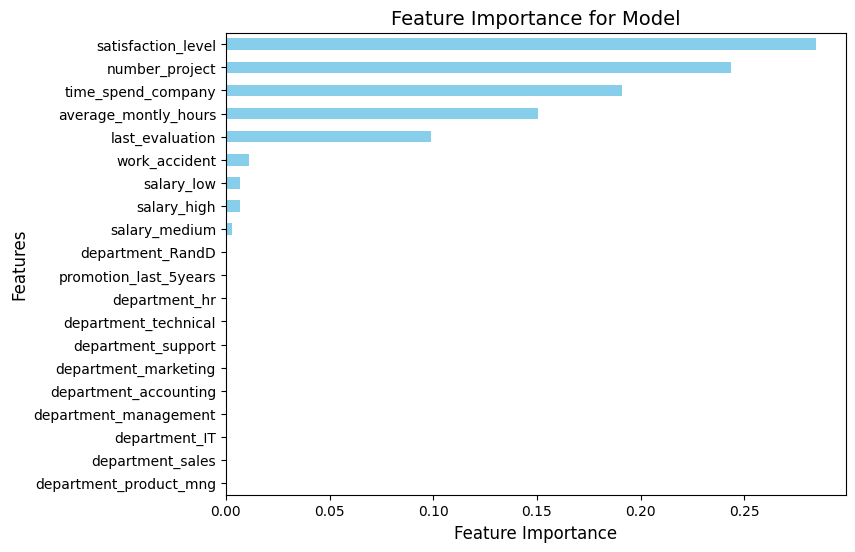

In [117]:
# Creating a Series for feature importances
importances = pd.Series(clf.feature_importances_, 
                        index=df_pro[features].columns, 
                        name='Feature Importance')

# Plotting the sorted feature importances as a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6)) 
importances.sort_values().plot(kind='barh', ax=ax, color='skyblue')

ax.set_xlabel('Feature Importance', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_title('Feature Importance for Model', fontsize=14)

#### 2.3.3. Principal component analysis (PCA)

In [119]:
# Printing all the features with low importance

importances = list(pd.Series(clf.feature_importances_, index=df_pro[features].columns)\
        .sort_values(ascending=False).index)

np.array(importances[5:])

array(['work_accident', 'salary_low', 'salary_high', 'salary_medium',
       'department_RandD', 'promotion_last_5years', 'department_hr',
       'department_technical', 'department_support',
       'department_marketing', 'department_accounting',
       'department_management', 'department_IT', 'department_sales',
       'department_product_mng'], dtype='<U22')

In [120]:
# Reducing selected features with PCA

from sklearn.decomposition import PCA

pca_features = ['work_accident', 'salary_low', 'salary_high', 'salary_medium',
       'promotion_last_5years', 'department_RandD', 'department_hr',
       'department_technical', 'department_support',
       'department_management', 'department_sales',
       'department_accounting', 'department_IT', 'department_product_mng',
       'department_marketing']

X_reduce = df_pro[pca_features]

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_reduce)

In [121]:
# Printing principal components

X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
X_pca

,PC1,PC2,PC3
0,-0.677331,0.758372,-0.104937
1,0.736166,0.771559,-0.110464
2,0.736166,0.771559,-0.110464
3,-0.677331,0.758372,-0.104937
4,-0.677331,0.758372,-0.104937
...,...,...,...
14994,-0.671571,-0.333755,0.709755
14995,-0.671571,-0.333755,0.709755
14996,-0.671571,-0.333755,0.709755
14997,-0.671571,-0.333755,0.709755


In [124]:
#Adding principal components to df_pro

df_pro['PC1'] = X_pca['PC1']
df_pro['PC2'] = X_pca['PC2']
df_pro['PC3'] = X_pca['PC3']
df_pro.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,PC1,PC2,PC3
0,0.38,0.53,2,157.000000,3.0,0,1,0,False,False,...,False,True,False,False,False,True,False,-0.677331,0.758372,-0.104937
1,0.80,0.86,5,262.000000,6.0,0,1,0,False,False,...,False,True,False,False,False,False,True,0.736166,0.771559,-0.110464
2,0.11,0.88,7,272.000000,4.0,0,1,0,False,False,...,False,True,False,False,False,False,True,0.736166,0.771559,-0.110464
3,0.72,0.87,5,223.000000,5.0,0,1,0,False,False,...,False,True,False,False,False,True,False,-0.677331,0.758372,-0.104937
4,0.37,0.52,2,160.163535,3.0,0,1,0,False,False,...,False,True,False,False,False,True,False,-0.677331,0.758372,-0.104937


In [128]:
# Selecting features for model 
features = ['satisfaction_level', 'number_project', 'time_spend_company',
            'average_montly_hours', 'last_evaluation', 'PC1', 'PC2', 'PC3']

X = df_pro[features].values
y = df_pro.left.values

In [130]:
# Training and validating Random Forest Classifier with reduced features
np.random.seed(1)
clf = RandomForestClassifier(n_estimators=50, max_depth=6)
scores = cross_val_class_score(clf, X, y)

print(f'Accuracy = {scores.mean(axis=0)} +/- {scores.std(axis=0)}')

fold: 1 accuracy: [0.99737303 0.91899441]
fold: 2 accuracy: [0.99825022 0.88515406]
fold: 3 accuracy: [0.99650044 0.89915966]
fold: 4 accuracy: [0.99125109 0.91316527]
fold: 5 accuracy: [0.99387577 0.88515406]
fold: 6 accuracy: [0.99562555 0.91316527]
fold: 7 accuracy: [0.99650044 0.92717087]
fold: 8 accuracy: [0.99300087 0.89915966]
fold: 9 accuracy: [0.99650044 0.91036415]
fold: 10 accuracy: [0.98949212 0.91876751]
Accuracy = [0.994837   0.90702549] +/- [0.00269678 0.01361605]


Text(0, 0.5, 'Accuracy')

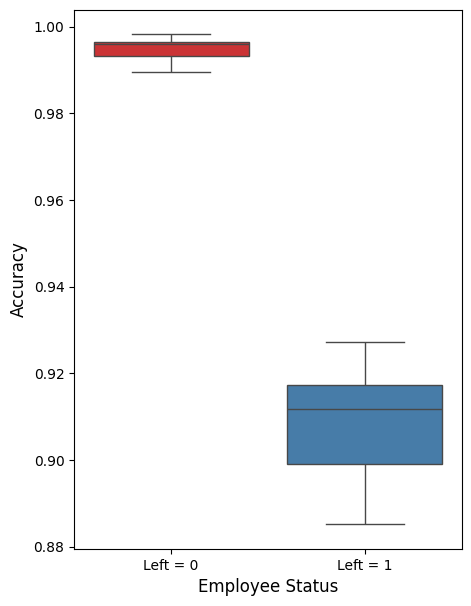

In [131]:
# Boxplot of the cross-validation scores

fig, ax = plt.subplots(figsize=(5, 7))
sns.boxplot(data=pd.DataFrame(scores, columns=["Left = 0", "Left = 1"]),
            palette="Set1", ax=ax)

ax.set_xlabel("Employee Status", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)

In [132]:
# Training the final model on all the samples

np.random.seed(1)
clf = RandomForestClassifier(n_estimators=50, max_depth=6)
clf.fit(X, y)

RandomForestClassifier(max_depth=6, n_estimators=50)

In [135]:
# Saving the model

import joblib
joblib.dump(clf, "random-forest_final_model.pkl")

['random-forest_final_model.pkl']

In [137]:
# Checking that it is saved to the working directory

!ls *.pkl

random-forest-trained.pkl     random-forest_final_model.pkl


In [139]:
# Loading the model from "pkl" file

clf_final = joblib.load("random-forest_final_model.pkl")
clf_final

RandomForestClassifier(max_depth=6, n_estimators=50)

#### 2.3.4. Predicting with final model

In [144]:
# Example employee
peter = df_pro.iloc[561]
X = peter[features]
X

satisfaction_level          0.37
number_project                 2
time_spend_company           3.0
average_montly_hours       131.0
last_evaluation             0.53
PC1                    -0.677331
PC2                     0.758372
PC3                    -0.104937
Name: 561, dtype: object

In [145]:
# Predicting whether employee left the company
clf.predict([X])

array([1])

In [146]:
# Predicting probability of employee leaving the company
clf.predict_proba([X])

array([[0.05109296, 0.94890704]])

In [147]:
# Reducing number of hours and time spent in the company and re-predicting
X.average_montly_hours = 100
X.time_spend_company = 1
clf.predict_proba([X])

array([[0.6966997, 0.3033003]])